In [889]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeRegressor  
from sklearn.linear_model import Ridge

In [804]:
df1 = pd.read_csv('aquastat_flat.csv',lineterminator='\r')
df2 = pd.read_csv('as2.csv',lineterminator='\r')[:-1]
df3 = pd.read_csv('as3.csv',lineterminator='\r')[:-1]
df4 = pd.read_csv('as4.csv',lineterminator='\r')[:-1]
df5 = pd.read_csv('as5.csv',lineterminator='\r')[:-1]
df6 = pd.read_csv('as6.csv',lineterminator='\r')[:-1]
df7 = pd.read_csv('as7.csv',lineterminator='\r')[:-1]
df8 = pd.read_csv('as8.csv',lineterminator='\r')[:-1]
df9 = pd.read_csv('as9.csv',lineterminator='\r')[:-1]
df10 = pd.read_csv('as10.csv',lineterminator='\r')[:-1]
df11 = pd.read_csv('as11.csv',lineterminator='\r')[:-1]
df12 = pd.read_csv('as12.csv',lineterminator='\r')[:-1]
df13 = pd.read_csv('as13.csv',lineterminator='\r')[:-1]
df14 = pd.read_csv('as14.csv',lineterminator='\r')[:-1]

In [805]:
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14])

In [806]:
df.Area.replace(regex=True,inplace=True,to_replace=r'\n',value=r'')
df.head()

,Area,Area Id,Variable Name,Variable Id,Year,Value
0,Afghanistan,2.0,% of total country area cultivated,4470.0,1982.0,12.34
1,Afghanistan,2.0,Total population,4104.0,1982.0,12750.00
2,Afghanistan,2.0,Rural population,4105.0,1982.0,10705.00
3,Afghanistan,2.0,Urban population,4106.0,1982.0,2045.00
4,Afghanistan,2.0,GDP per capita,4458.0,1981.0,272.80


In [811]:
clean_df =  pd.pivot_table(df,index = ['Area','Year'],columns = 'Variable Name', values = 'Value')
clean_df = clean_df.reset_index()
print("# of countries: {}".format(len(clean_df.Area.unique())))
clean_df.head()

# of countries: 201


Variable Name,Area,Year,% of agricultural water managed area equipped for irrigation,% of area equipped for full control irrigation actually irrigated,% of area equipped for irrigation by direct use of treated municipal wastewater,% of area equipped for irrigation by direct use of non-treated municipal wastewater,% of area equipped for irrigation by groundwater,% of area equipped for irrigation by mixed surface water and groundwater,% of area equipped for irrigation by surface water,% of area equipped for irrigation drained,...,Total renewable surface water,Total renewable water resources,Total renewable water resources per capita,Total water withdrawal,Total water withdrawal per capita,Treated municipal wastewater,Treated municipal wastewater discharged (secondary water),Urban population,Urban population with access to safe drinking-water (JMP),Water resources: total external renewable
0,Afghanistan,1980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1981.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1982.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.68,65.33,5124.0,NaN,NaN,NaN,NaN,2045.0,NaN,18.18
3,Afghanistan,1985.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1986.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [812]:
# Clumping into 5 year intervals using the average of 2 years before and 3 years after
# All Years
all_years = set(clean_df["Year"])
print("Range of all years {} : {}".format(min(all_years), max(all_years)))
dfs = []
for i in range(1980, 2016, 5):
    filtered = clean_df[(clean_df["Year"] > i -2) & (clean_df["Year"] < i + 3)]
    f_group = filtered.groupby("Area").mean()
    f_group["Year"] = i
    dfs.append(f_group)
df_every_5 = pd.concat(dfs)   
print("Aggregated into the following bins: " + str(df_every_5["Year"].unique()))

Range of all years 1978.0 : 2017.0
Aggregated into the following bins: [1980 1985 1990 1995 2000 2005 2010 2015]


In [813]:
g50r = df_every_5[df_every_5.count(axis = 1) >= 50]
len(g50r.index.unique())
grouped = g50r.groupby("Area").count().sort_values(by ='Year',ascending = False).reset_index()
good_candidates = grouped[grouped["Year"] > 5]["Area"]
df_good_candidates = g50r.set_index("Year")
df_good_candidates
g50r[g50r.index == "Jordan"].count()
special = ["GDP per capita"]
dense_variables = {v:np.mean(grouped[v]) for v in grouped.columns[1:] if np.mean(grouped[v]) > 5.5 or v in special}

print("{} variables passed the density tests above".format(len(dense_variables)))

40 variables passed the density tests above


In [866]:
# Dropping obviously collinear columns
to_drop = [i for i in list(final_data.columns) if "treat" in i] + ["Gross Domestic Product (GDP)", "Long-term average annual precipitation in depth", "Overlap: between surface water and groundwater", "Total internal renewable water resources per capita"]

In [867]:
# Dropping countries with high numbers of Nans
dense_df = df_every_5[list(dense_variables.keys())].reset_index()
grouped = dense_df.groupby("Area").count().sort_values(by ='Year',ascending = False)
totals = grouped.sum(axis=1)
np.mean(totals)
best_countries = totals[totals > 275].index
print("{} countries with sufficient data".format(len(best_countries)))
final_data = dense_df[dense_df["Area"].isin(best_countries)].drop(columns=to_drop)

# final_data = final_data.interpolate()
print("Total nans = {}".format(sum(final_data.isna().sum())))
final_data.to_csv("final_cleaned_data.csv")
final_data.head()
final_data[final_data.isna().any(axis=1)]
# for i in final_data.columns:
#     print(i, sum(final_data[i].isna()))
final_data.head()

145 countries with sufficient data
Total nans = 195


Variable Name,Area,Year,% of total country area cultivated,Arable land area,Cultivated area (arable land + permanent crops),Dependency ratio,GDP per capita,Groundwater produced internally,Groundwater: accounted inflow,Groundwater: entering the country (total),...,Surface water: total flow of border rivers,Total area of the country (excl. coastal waters),Total internal renewable water resources (IRWR),Total population,Total renewable groundwater,Total renewable surface water,Total renewable water resources,Total renewable water resources per capita,Urban population,Water resources: total external renewable
0,Afghanistan,1980,12.340,7910.0,8054.0,28.7200,272.8,10.650,0.00,0.00,...,33.4,65286.0,47.15,12750.0,10.650,55.68,65.33,5124.0,2045.0,18.18
1,Albania,1980,24.660,589.0,709.0,10.9300,NaN,6.200,0.00,0.00,...,0.0,2875.0,26.90,2788.0,6.200,26.35,30.20,10832.0,982.0,3.30
2,Algeria,1980,3.153,6881.0,7509.0,3.5990,2197.0,1.487,0.03,0.03,...,0.0,238174.0,11.25,20576.0,1.517,10.15,11.67,567.2,9408.0,0.42
4,Angola,1980,2.727,2900.0,3400.0,0.2695,NaN,58.000,0.00,0.00,...,0.0,124670.0,148.00,9582.0,58.000,145.40,148.40,15487.0,1707.0,0.40
6,Argentina,1980,10.070,27000.0,27992.0,66.6700,2908.0,128.000,0.00,0.00,...,135.9,278040.0,292.00,28994.0,128.000,860.20,876.20,30220.0,24281.0,584.20


In [868]:
# Interpolate approach 1
""""
def closest_years(y):
    if y == 2015:
        return [2005, 2010]
    elif y == 1980:
        return [1985, 1990]
    else:
        return [y-5, y+5]

def interpolate(df, i):
    row = df.iloc[i]
    for var in df.columns[pd.isna(row)]:
        df.at[i, ] = np.mean(df[df["Area"] == row["Area"]][var])

print("Before: Total nans = {}".format(sum(final_data.isna().sum())))
for i in range(len(final_data)):
    interpolate(final_data, i)
print("After: Total nans = {}".format(sum(final_data.isna().sum())))
"""
# Interpolate approach 2
print("Before interpolation: Total nans = {}".format(sum(final_data.isna().sum())))
split_data = []
for country in final_data["Area"].unique():
    filtered = final_data[final_data["Area"] == country]
    interpolated = filtered.drop(columns="Area").interpolate(axis=1)
    interpolated["Area"] = country
    split_data += [interpolated]
final_data = pd.concat(split_data)
print("After: Total nans = {}".format(sum(final_data.isna().sum())))
final_data.describe()

Before interpolation: Total nans = 195
After: Total nans = 0


Variable Name,Year,% of total country area cultivated,Arable land area,Cultivated area (arable land + permanent crops),Dependency ratio,GDP per capita,Groundwater produced internally,Groundwater: accounted inflow,Groundwater: entering the country (total),Long-term average annual precipitation in volume,...,Surface water: total flow of border rivers,Total area of the country (excl. coastal waters),Total internal renewable water resources (IRWR),Total population,Total renewable groundwater,Total renewable surface water,Total renewable water resources,Total renewable water resources per capita,Urban population,Water resources: total external renewable
count,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,...,1160.000000,1160.000000,1160.000000,1.160000e+03,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000,1160.000000
mean,1997.500000,27.427817,7865.624649,8733.940780,22.957364,8128.846779,66.728779,0.016628,0.093731,664.871231,...,349.457591,73584.794793,258.454390,3.965244e+04,66.745393,328.607569,335.214300,28345.348654,18694.115328,76.760324
std,11.461381,123.990941,22779.913974,24032.371625,29.141082,14326.807683,166.327636,0.180887,0.926046,1652.339245,...,2944.441282,169818.302110,678.185947,1.417045e+05,166.318005,884.412574,891.285739,70012.726567,58340.333235,283.128648
min,1980.000000,0.043100,1.000000,1.000000,0.000000,0.007500,0.000000,-1.200000,0.000000,0.057300,...,0.000000,2.600000,0.000000,4.135000e+01,0.015000,0.000000,0.020000,1.418000,14.180000,-15.400000
25%,1988.750000,4.233500,300.000000,426.950000,0.000000,550.575000,2.200000,0.000000,0.000000,39.960000,...,0.000000,3839.000000,8.215000,2.622000e+03,2.200000,11.870000,13.300000,1753.500000,1112.500000,0.000000
50%,1997.500000,12.980000,1800.000000,2172.500000,7.407000,1969.000000,10.000000,0.000000,0.000000,191.300000,...,0.000000,21497.000000,44.800000,8.945500e+03,10.000000,65.900000,68.400000,5433.500000,3808.500000,3.800000
75%,2006.250000,27.272500,4985.000000,5837.000000,39.250000,8416.250000,47.000000,0.000000,0.000000,476.100000,...,0.540000,63766.000000,171.000000,2.529200e+04,47.000000,214.100000,217.100000,24042.500000,12957.250000,30.000000
max,2015.000000,1514.107500,187765.000000,189799.000000,100.000000,106010.000000,1383.000000,1.330000,11.130000,14995.000000,...,31149.000000,998467.000000,5661.000000,1.441131e+06,1383.000000,8647.000000,8647.000000,728676.000000,846035.000000,2986.000000


In [869]:
variables = [i for i in final_data.columns if i not in ["Area", "Year"]]
print("Final columns : {}\n\n Final Countries: {}".format(variables, best_countries))

Final columns : ['% of total country area cultivated', 'Arable land area', 'Cultivated area (arable land + permanent crops)', 'Dependency ratio', 'GDP per capita', 'Groundwater produced internally', 'Groundwater: accounted inflow', 'Groundwater: entering the country (total)', 'Long-term average annual precipitation in volume', 'Overlap between surface water and groundwater', 'Permanent crops area', 'Population density', 'Rural population', 'Surface water produced internally', 'Surface water: accounted flow of border rivers', 'Surface water: accounted inflow', 'Surface water: entering the country (total)', 'Surface water: leaving the country to other countries (total)', 'Surface water: total external renewable', 'Surface water: total flow of border rivers', 'Total area of the country (excl. coastal waters)', 'Total internal renewable water resources (IRWR)', 'Total population', 'Total renewable groundwater', 'Total renewable surface water', 'Total renewable water resources', 'Total rene

In [1]:
filter_fn1 = lambda y: y["Year"] == x - 10
filter_fn2 = lambda y: y["Year"] == x - 5
filter_fn3 = lambda y: y["Year"] == x
midEast = ['Iran (Islamic Republic of)', 'Tunisia', 'Turkey','Algeria','Egypt', 'Cyprus','Morocco','Lebanon','Yemen']

def get(df, v):
    """
    Gets the first value at v in df.
    """
    return df.loc[:,v].values[0]

features = [i for i in variables if i not in ["Year", "Area"]]

def build_tables(df, countries, features):
    """
    Constructs a look up table of data frames indexed by the country and feature. 
    Each row contains
        The feature of interest in the predicted year, 5 years before and 10 years before
        The feature of interest for all other countries in the region 5 years before
        All features for the country 5 years before.
    """
    country_dfs = {}
    for country in countries:
        per_var = {}
        for var in features:
            all_rows = []
            for x in range(1990, 2021, 5):
                country_filter = df[df["Area"] == country]
                year_filter = df[df["Year"] == x]
                
                # Special casing for 2020
                if x != 2020:
                    predicted_value = get(year_filter[year_filter["Area"] == country], var)
                else:
                    predicted_value = 'nan'
                    
                new_row = {
                    "Predicted Year": x, 
                    "Country": country, 
                    "Variable": var,
                    "Year - 10": get(country_filter[country_filter["Year"] == x - 10], var), 
                    "Year - 5": get(country_filter[country_filter["Year"] == x - 5], var), 
                    "Predicted Value": predicted_value
                }
                # Adding in the other variables for the specific country in year x-5
                country_year_filter = country_filter[country_filter["Year"] == x-5]
                country_vars = {"{}_{}".format(v, country) : get(country_year_filter, v) for v in features if v != var}
                new_row.update(country_vars)
                
                # Adding the specific variable for other countries in x-5
                year_filter_5 = df[df["Year"] == x-5]
                var_for_other_countries_5 = {"{}_{}_5".format(c, var): get(year_filter_5[year_filter_5["Area"] == c], var) for c in countries}
                new_row.update(var_for_other_countries_5)
                
                # Adding the specific variable for other countries in x-10
                year_filter_10 = df[df["Year"] == x-10]
                var_for_other_countries_10 = {"{}_{}_10".format(c, var): get(year_filter_10[year_filter_10["Area"] == c], var) for c in countries}#
                new_row.update(var_for_other_countries_10)
                
                all_rows.append(new_row)
            per_var[var] = pd.DataFrame(all_rows)
        country_dfs[country] = per_var
    return country_dfs
    
country_dfs = build_tables(final_data, midEast, features)
country_dfs[midEast[0]][features[0]]["Predicted Value"]

NameError: name 'variables' is not defined

In [871]:
country_dfs[midEast[0]]["GDP per capita"]["Predicted Value"]

0    326.4
1     2146
2     1818
3     1898
4     4679
5     7678
6      nan
Name: Predicted Value, dtype: object

In [891]:
def train_test_split(df, year=2015):
    """
    Splits the data into
        training set of all years except `year`
        & test set of the data in `year`
    """
    df_train = df[(df["Predicted Year"] != year) & (df["Predicted Year"] != 2020)]
    X_train = df_train.drop(columns=["Predicted Value", "Predicted Year"])
    y_train = df_train["Predicted Value"]
    df_test = df[df["Predicted Year"] == year]
    X_test = df_test.drop(columns=["Predicted Value", "Predicted Year"])
    y_test = df_test["Predicted Value"]
    return X_train, X_test, y_train, y_test

In [892]:
def loocv(df, model):
    """
    Returns the cross-validated error for a model using LOOCV
    """
    errors = []
    for year in range(1990, 2015, 5):
        m = model()
        X_train, X_test, y_train, y_test = train_test_split(df, year)
        m.fit(X_train, y_train)
        pred = m.predict(X_test)
        errors.append((pred[0] - y_test.values[0])**2)
    return np.mean(errors)

In [893]:
def train(country_dfs, country, var_name, model=DecisionTreeRegressor):
    """
    Trains and cross validates a model to populate a 
    dictionary that is used to find the model with lowest CV error
    """
    df = country_dfs[country][var_name]
    df = df.drop(columns=["Country", "Variable"])
    m = model()
    X_train, X_test, y_train, y_test = train_test_split(df)
    m.fit(X_train, y_train)
    pred = m.predict(X_test)
    return m, loocv(df, model)

important_features = features
models = [DecisionTreeRegressor, LinearRegression, Ridge]
def train_and_cross_validate(important_features, models, region):
    """
    Constructs a lookup table of the models and their CV errors per country feature pair in the region
    """
    trained_models = {i:{c:{} for c in region} for i in important_features}
    for c in region:
        for i in important_features:
            for m in models:
                model, error = train(country_dfs, c, i, m)
                trained_models[i][c][m] = error
    return trained_models
midEastModels = train_and_cross_validate(important_features, models, midEast)

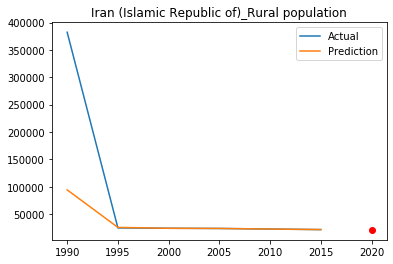

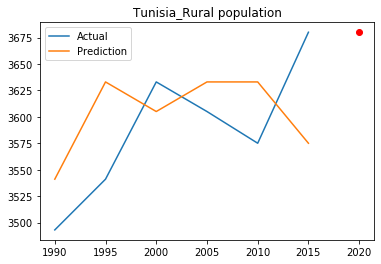

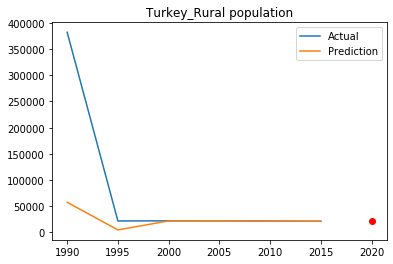

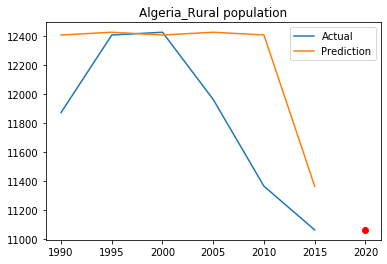

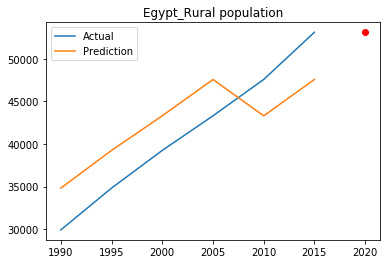

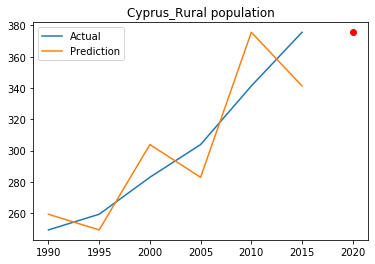

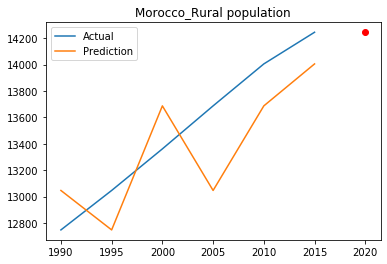

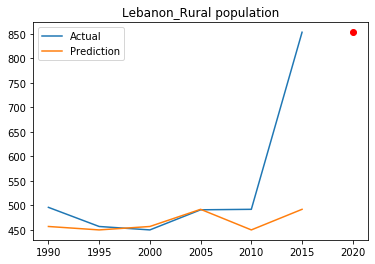

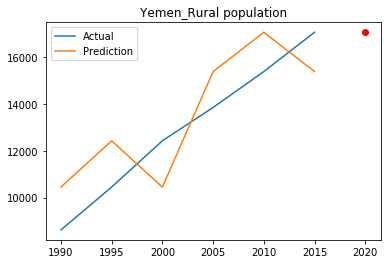

In [896]:
def predict(model, country_dfs, country, var_name, year, project=False):
    """
    Predicts a single value `year` for the `var_name`, `country` pair
    """
    df = country_dfs[country][var_name]
    df = df.drop(columns=["Country", "Variable"])
    m = model()
    if project:
        train = df[df["Predicted Year"] != year]
        m.fit(train.drop(columns=["Predicted Value", "Predicted Year"]), train["Predicted Value"])
        X = df[df["Predicted Year"] == year].drop(columns=["Predicted Value", "Predicted Year"])
        return m.predict(X)
    X_train, X_test, y_train, y_test = train_test_split(df, year)
    m.fit(X_train, y_train)
    pred = m.predict(X_test)
    return pred, y_test.values[0]
    
    
def plot_region(region, feature, models=models, save=False):
    """
    Plots the feature for all countries in the `region`. 
    Optionally saves to a pdf
    """
    all_models = train_and_cross_validate(important_features, models, region)
    for c in region:
        m = min(all_models[feature][c].items(), key=lambda x: x[1])[0]
        xs = list(range(1990, 2020, 5))
        ys, preds = [], []
        for year in xs:
            pred, y = predict(m, country_dfs, c, feature, year)
            preds.append(pred)
            ys.append(y)
        projection = predict(m, country_dfs, c, feature, 2020, project=True)
        plt.plot(xs, ys, label="Actual")
        plt.plot(xs, preds, label="Prediction")
        plt.plot(2020, projection, 'ro')
        plt.legend()
        plt.title("{}_{}".format(c, feature))
        if save:
            plt.savefig("{}_{}.pdf".format(c, feature))
        else:
            plt.show()
        plt.clf()

plot_region(midEast, "Rural population")
# [predict(LinearRegression, country_dfs, midEast[0], "GDP per capita", x) for x in  list(range(1990, 2015, 5))]